In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# !unzip gdrive/MyDrive/'Key folders'/python_class/deep-learning-keras-tensorflow-master.zip

In [3]:
from keras.datasets import cifar10

from keras.layers import Input, Dense
from keras.models import Model

import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 96, assuming the input is 3072 floats

input_img = Input(shape=(3072,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [6]:
encoder = Model(input_img, encoded)

In [7]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

170498071/170498071 [==============================] - 3s 0us/step


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
196/196 [==============================] - 16s 68ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 2/100
196/196 [==============================] - 11s 54ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 3/100
196/196 [==============================] - 7s 37ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 4/100
196/196 [==============================] - 6s 33ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 5/100
196/196 [==============================] - 7s 37ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 6/100
196/196 [==============================] - 6s 33ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 7/100
196/196 [==============================] - 7s 37ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 8/100
196/196 [==============================] - 7s 38ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 9/100
196/196 [==============================] - 6s 32ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 10/100
196/196 [==============================] - 7s 38ms/step - loss: 0.6

313/313 [==============================] - 1s 3ms/step


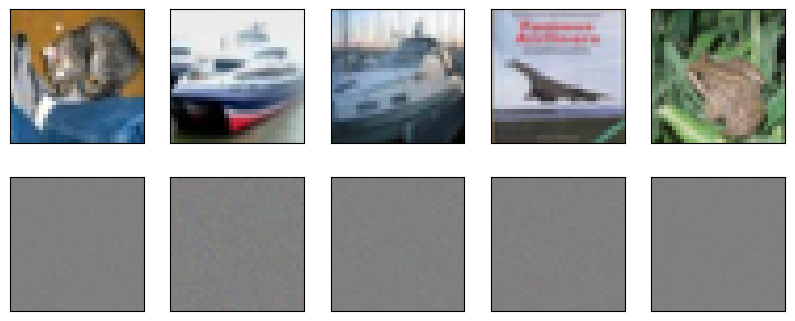

In [14]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()